<h2 style="color:blue" align="center">Handwritten digits classification using KNN</h2>

# What is Handwritten Digit Recognition?
The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

# The MNIST dataset
This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

# Import the libraries and load the dataset
First, we are going to import all the modules that we are going to need for training our model. The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

# Preprocess the data
The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. We need to scale data as KNN required this. The dimension of the training data is (60000,28,28). The KNN model will require two dimension, so we reshape the matrix to shape (60000,784).

In [ ]:
#pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import datasets

In [ ]:
#print(np.__version__)

In [3]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [ ]:
type(X_train)

In [8]:
X_train[0].shape

(28, 28)

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Axes: >

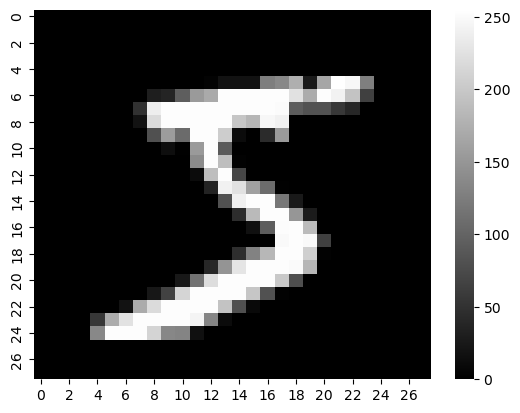

In [14]:
sns.heatmap(X_train[0], cmap = 'gray')

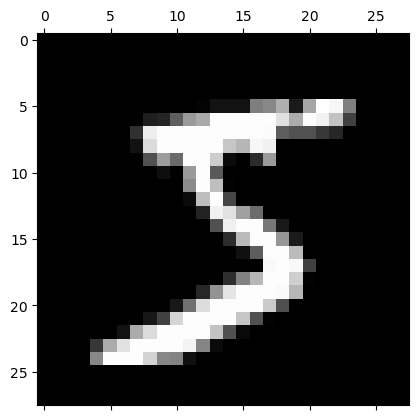

In [15]:
plt.matshow(X_train[0], cmap='gray')

In [19]:
y_train[0]

5

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[59999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Axes: >

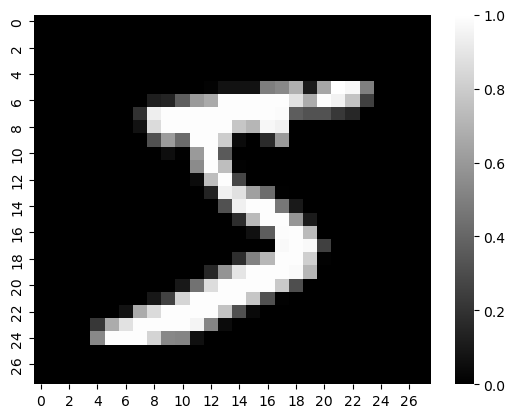

In [24]:
sns.heatmap(X_train[0], cmap = 'gray')

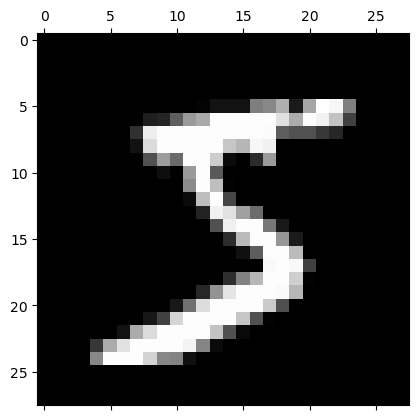

In [25]:
plt.matshow(X_train[0], cmap='gray')

In [26]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)   #60000, 784
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_flattened[0].shape

In [29]:
plt.matshow(X_train_flattened[0])

ValueError: not enough values to unpack (expected 2, got 1)

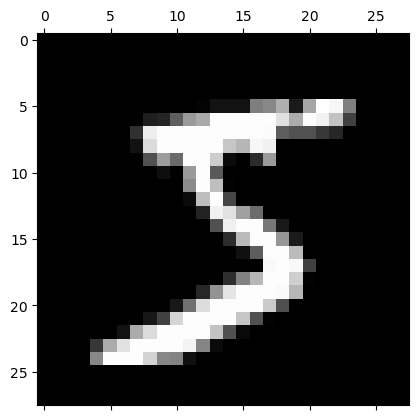

In [30]:
plt.matshow(X_train_flattened[0].reshape(28,28), cmap='gray')

In [ ]:
y_train.shape

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  #default: n_neighbors=5, , metric='euclidean'
knn.fit(X_train_flattened, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
knn.score(X_test_flattened, y_test)

0.9705

In [ ]:
plt.matshow(X_test_flattened[0].reshape(28,28), cmap='gray') 

In [ ]:
knn.predict(X_test_flattened[[0]])

In [ ]:
plt.matshow(X_test_flattened[[0]].reshape(28,28), cmap='gray')

In [ ]:
y_test[0]

In [ ]:
prediction =knn.predict(X_test_flattened)

In [ ]:
prediction[0]

In [ ]:
y_test[0]

In [33]:
import joblib as jbl

jbl.dump(knn,'KNNModel_Job')

['KNNModel_Job']